Inference Model on Random Images

---

In [1]:
import os
import random
import numpy as np
import tensorflow as tf
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Function to load the model
def load_model(model_path):
    model = tf.keras.models.load_model(model_path)
    return model

# Function to preprocess a single image for inference
def preprocess_image(img_path, target_size):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize the image
    return img_array

# Function to display an image
def display_image(img_path):
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('off')  # Hide axis
    plt.show()

# Function to perform inference on a single image and display the result
def predict_and_display_image(model, img_path, target_size=(224, 224), class_names=None):
    # Preprocess the image
    img_array = preprocess_image(img_path, target_size)
    
    # Predict the class
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)
    
    # Display the image
    display_image(img_path)
    
    # Show the predicted class and confidence
    if class_names:
        class_name = class_names[predicted_class[0]]
        print(f"File: {os.path.basename(img_path)}")
        print(f"Predicted class: {class_name}")
    else:
        print(f"File: {os.path.basename(img_path)}")
        print(f"Predicted class (index): {predicted_class}")
    
    print(f"Prediction confidence: {prediction}")

# Function to perform inference on 10 random images and display each
def predict_and_display_random_images(model, img_dir, target_size=(128, 128), class_names=None):
    # Get all image files from the directory
    img_files = [f for f in os.listdir(img_dir) if f.endswith('.jpg')]
    
    # Select random images
    random_img_files = random.sample(img_files, 10)
    
    for img_file in random_img_files:
        img_path = os.path.join(img_dir, img_file)
        print(f"\nImage: {img_file}")
        predict_and_display_image(model, img_path, target_size, class_names)



Image: cocci.442.jpg
1/1 [==============================] - 1s 723ms/step


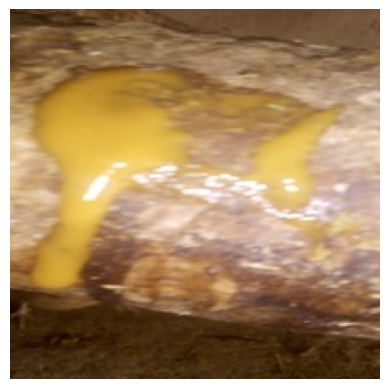

File: cocci.442.jpg
Predicted class: Coccidiosis
Prediction confidence: [[9.9992013e-01 1.2924262e-08 5.0751991e-10 7.9842153e-05]]

Image: healthy.1896.jpg
1/1 [==============================] - 0s 32ms/step


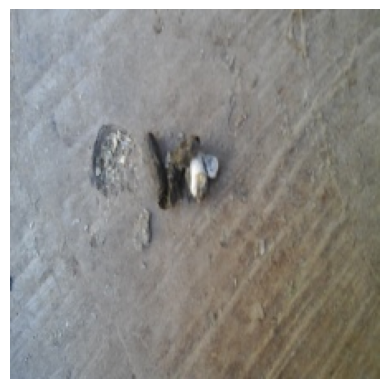

File: healthy.1896.jpg
Predicted class: Healthy
Prediction confidence: [[9.7967063e-17 1.0000000e+00 2.7853555e-12 1.8638496e-12]]

Image: cocci.2469.jpg
1/1 [==============================] - 0s 34ms/step


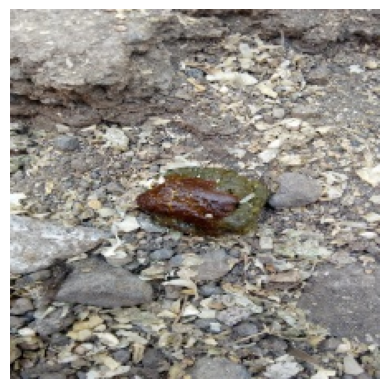

File: cocci.2469.jpg
Predicted class: Coccidiosis
Prediction confidence: [[1.0000000e+00 1.7189226e-09 4.1845936e-08 4.4875489e-11]]

Image: cocci.1976.jpg
1/1 [==============================] - 0s 33ms/step


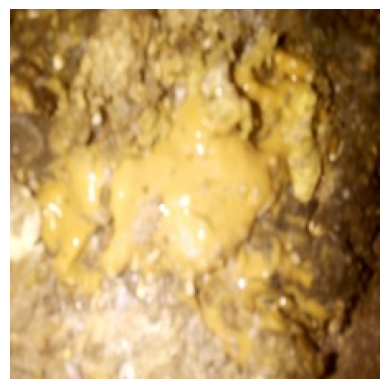

File: cocci.1976.jpg
Predicted class: Coccidiosis
Prediction confidence: [[1.0000000e+00 2.0507999e-10 9.6014613e-11 4.1535895e-08]]

Image: cocci.2210.jpg
1/1 [==============================] - 0s 66ms/step


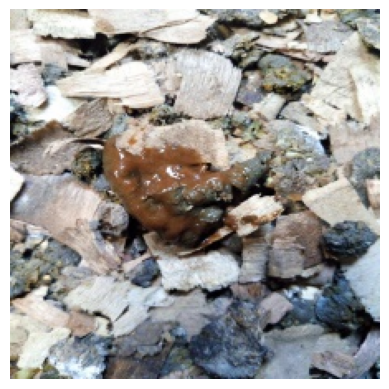

File: cocci.2210.jpg
Predicted class: Coccidiosis
Prediction confidence: [[1.0000000e+00 4.5946868e-11 2.0851173e-15 3.7570863e-13]]

Image: cocci.1669.jpg
1/1 [==============================] - 0s 26ms/step


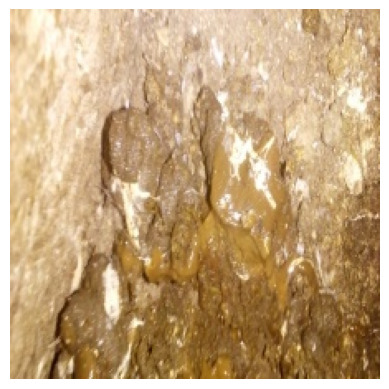

File: cocci.1669.jpg
Predicted class: Coccidiosis
Prediction confidence: [[9.99999881e-01 4.94560781e-10 3.08273540e-09 1.01862305e-07]]

Image: salmo.1129.jpg
1/1 [==============================] - 0s 31ms/step


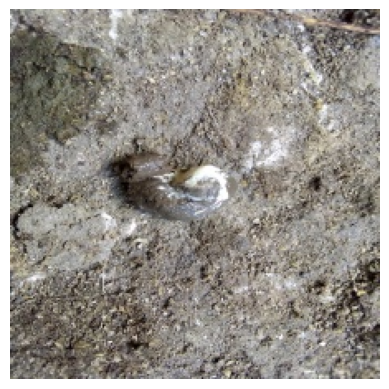

File: salmo.1129.jpg
Predicted class: Salmonella
Prediction confidence: [[1.4913755e-10 1.2296319e-07 8.9062855e-09 9.9999988e-01]]

Image: cocci.1809.jpg
1/1 [==============================] - 0s 31ms/step


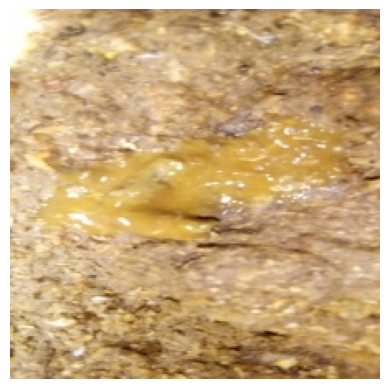

File: cocci.1809.jpg
Predicted class: Coccidiosis
Prediction confidence: [[9.9996197e-01 1.5890943e-10 3.6116354e-15 3.8066355e-05]]

Image: salmo.1063.jpg
1/1 [==============================] - 0s 47ms/step


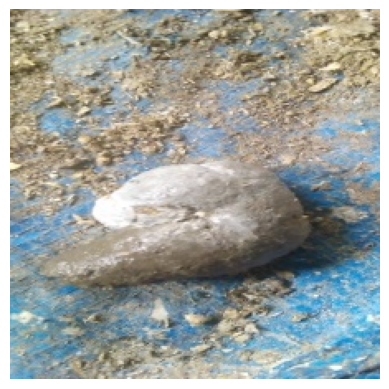

File: salmo.1063.jpg
Predicted class: Salmonella
Prediction confidence: [[2.7196950e-06 2.2134254e-08 2.8125186e-10 9.9999726e-01]]

Image: salmo.2182.jpg
1/1 [==============================] - 0s 27ms/step


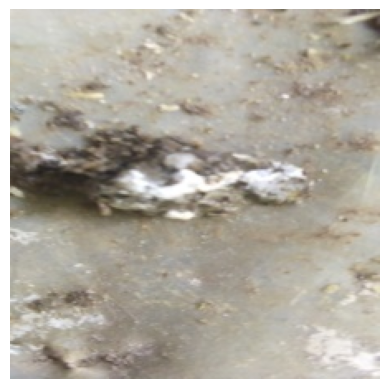

File: salmo.2182.jpg
Predicted class: Salmonella
Prediction confidence: [[1.4670713e-08 9.2753638e-11 4.0400864e-13 1.0000000e+00]]


In [2]:
# Load the model
model_path = '../model/mobilenetV2/mobilenetv2_ft.h5'
model = load_model(model_path)

# Define class names
class_names = ['Coccidiosis', 'Healthy', 'NewCastleDisease', 'Salmonella'] 

# Perform inference on 10 random images from Dataset/Train folder
img_dir = '../all_new'  # Path ke folder gambar
predict_and_display_random_images(model, img_dir, class_names=class_names)

---